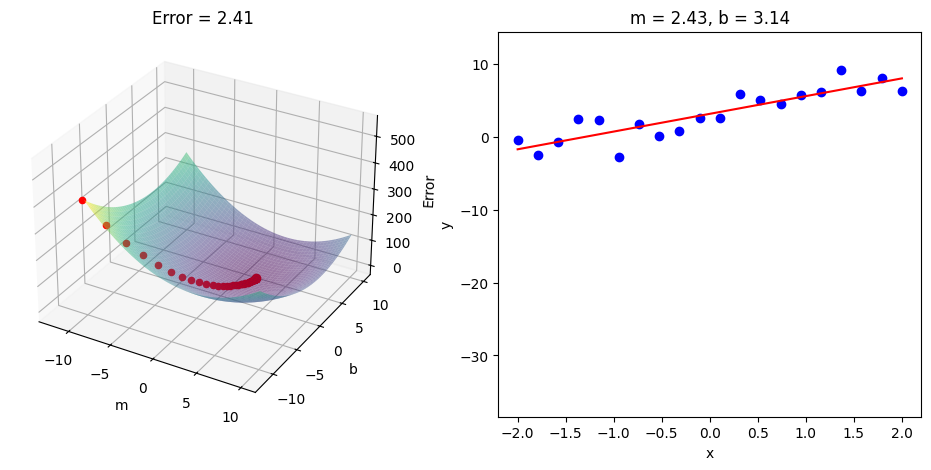

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Generate some sample data
np.random.seed(0)
x = np.linspace(-2, 2, 20)
y = 3 * x + 2 + np.random.normal(scale=2, size=x.shape)

# Define the loss function
def compute_error(m, b, x, y):
    return np.mean((y - (m * x + b))**2)

# Gradient descent update
def gradient_descent_step(m, b, x, y, lr):
    N = len(y)
    dm = -2 / N * np.sum(x * (y - (m * x + b)))
    db = -2 / N * np.sum(y - (m * x + b))
    m -= lr * dm
    b -= lr * db
    return m, b

# Create a grid for the error surface
m_vals = np.linspace(-10, 10, 100)
b_vals = np.linspace(-10, 10, 100)
M, B = np.meshgrid(m_vals, b_vals)
Z = np.array([[compute_error(m, b, x, y) for m, b in zip(row_m, row_b)] for row_m, row_b in zip(M, B)])

# Initialize parameters
m, b = -12, -12
learning_rate = 0.05

# Set up the figure and axes
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# Plot the error surface
surf = ax1.plot_surface(M, B, Z, cmap='viridis', alpha=0.5, edgecolor='none')
point = ax1.plot([m], [b], [compute_error(m, b, x, y)], 'ro')[0]
ax1.set_xlabel('m')
ax1.set_ylabel('b')
ax1.set_zlabel('Error')
ax1.set_title('Error = {:.2f}'.format(compute_error(m, b, x, y)))

# Plot the data and initial line
ax2.scatter(x, y, color='blue')
line, = ax2.plot(x, m * x + b, 'r-')
ax2.set_title(f'm = {m:.2f}, b = {b:.2f}')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# Update function for animation
def update(frame):
    global m, b
    m, b = gradient_descent_step(m, b, x, y, learning_rate)
    error = compute_error(m, b, x, y)

    # plot previous points
    ax1.scatter([m], [b], [error], color='red')

    # Update the 3D point
    point.set_data([m], [b])
    point.set_3d_properties([error])
    ax1.set_title('Error = {:.2f}'.format(error))

    # Update the line in the 2D plot
    line.set_ydata(m * x + b)
    ax2.set_title(f'm = {m:.2f}, b = {b:.2f}')

    return point, line

# Create the animation
ani = FuncAnimation(fig, update, frames=100, interval=100, blit=False)

# Save the animation (optional)
ani.save('gradient_descent.gif', writer='imagemagick')